# Comparando SVM com outros algoritmos (Classificação Binária - Preço Casas)

In [1]:
import trab03_utils as util

ds_dadosbrutos = util.getDSPriceHousing_ClassProb()
ds_dadosbrutos.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address,high_price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...",False
1,79248.642455,6.002900,6.730821,3.09,40173.072174,"188 Johnson Views Suite 079\r\nLake Kathleen, ...",True
2,61287.067179,5.865890,8.512727,5.13,36882.159400,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064...",False
3,63345.240046,7.188236,5.586729,3.26,34310.242831,USS Barnett\r\nFPO AP 44820,False
4,59982.197226,5.040555,7.839388,4.23,26354.109472,USNS Raymond\r\nFPO AE 09386,False


In [3]:
import autoML

automl = autoML.AutoML(ds_dadosbrutos, 'high_price'
                             , min_x_y_correlation_rate=0.1
                             , n_features_threshold=0.75)

dfResults = automl.getResults()
dfResults.head(10)

,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.323080,206.210938,0.822167,0.910,0.970685,"[[701, 38], [47, 214]]"
1,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",5,1.374620,207.035156,0.812659,0.908,0.968161,"[[700, 39], [48, 213]]"
2,KNeighborsClassifier,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,2.150091,196.890625,0.784189,0.893,0.948313,"[[698, 41], [49, 212]]"
3,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.487183,206.222656,0.763477,0.883,0.944404,"[[704, 35], [70, 191]]"
4,KNeighborsClassifier,"(Avg. Area Income, Avg. Area House Age, Avg. A...",5,2.195904,197.613281,0.735255,0.877,0.921373,"[[698, 41], [67, 194]]"
5,LogisticRegression,"(Avg. Area Income, Avg. Area House Age, Avg. A...",5,2.190650,194.558594,0.714465,0.881,0.974150,"[[717, 22], [60, 201]]"
6,LogisticRegression,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,2.242486,193.714844,0.707375,0.879,0.975941,"[[716, 23], [62, 199]]"
7,DecisionTreeClassifier,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,2.092941,197.753906,0.704636,0.853,0.783440,"[[677, 62], [56, 205]]"
8,DecisionTreeClassifier,"(Avg. Area Income, Avg. Area House Age, Avg. A...",5,2.066388,197.531250,0.702336,0.842,0.784330,"[[680, 59], [72, 189]]"
9,KNeighborsClassifier,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,2.162854,197.039062,0.697042,0.853,0.886651,"[[691, 48], [73, 188]]"


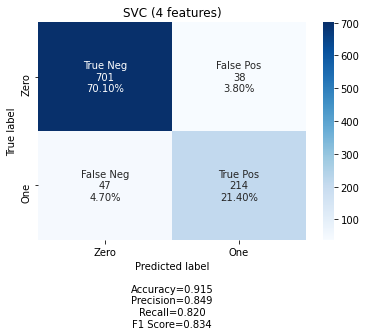

In [4]:
automl.getBestConfusionMatrix()

In [5]:
dfGroupBy_algorithm = dfResults.groupby('algorithm').mean().sort_values('f1', ascending=False)
dfGroupBy_algorithm

,train_time,mem_max,f1,accuracy,roc_auc
algorithm,,,,,
SVC,1.481530,210.858724,0.685266,0.859833,0.913158
KNeighborsClassifier,2.160488,197.219401,0.650725,0.837833,0.861273
DecisionTreeClassifier,2.043827,197.680339,0.610942,0.794000,0.728965
LogisticRegression,2.230876,193.959635,0.609584,0.847500,0.927103


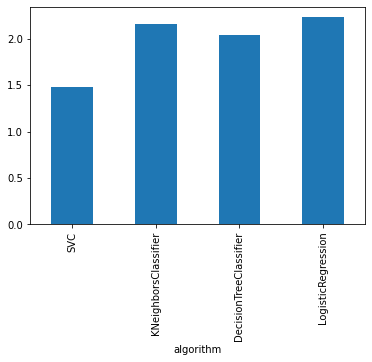

In [6]:
dfGroupBy_algorithm['train_time'].plot.bar();

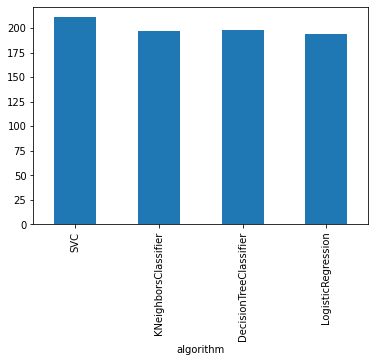

In [7]:
dfGroupBy_algorithm['mem_max'].plot.bar();

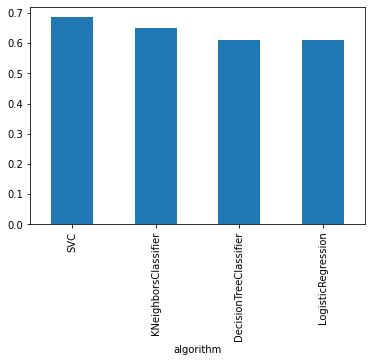

In [8]:
dfGroupBy_algorithm['f1'].plot.bar();

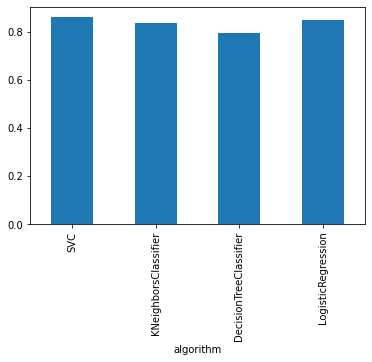

In [9]:
dfGroupBy_algorithm['accuracy'].plot.bar();

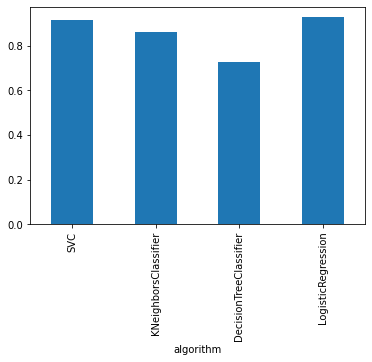

In [10]:
dfGroupBy_algorithm['roc_auc'].plot.bar();